In [57]:
import pandas as pd
import os
from joblib import dump, load
import seaborn as sns

En este notebook se procesan los datos de distintas convocatorias para generar los datos de entrenamiento. Las convocatorias consideradas son:

- CA: Cátedras
    - 2014, 2015, 2016, 2017, 2018
- FC: Fronteras de la Ciencia
    - 2016, 2015
- MIIC
    - ??
- PN: Problemas Nacionales
    - 2015, 2016, 2017

___

In [58]:
files_path = "../../data/data_entrenamiento/data_entrenamiento_raw/historico_convocatorias/"

In [59]:
proy_ca = pd.read_csv(files_path + "proyectos_ca.csv")

In [60]:
proy_ca.head(2)

,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,PALABRAS_CLAVE,SUBDISCIPLINA,DISCIPLINA,AREA,TITULO,DESCRIPCION
0,1359,CATEDRAS-2014-01,2014,NaN,NaN,NaN,NaN,METODOS TOPOLOGICOS EN GEOMETRIA Y FISICA,Se espera que en 10 años dentro del marco del ...
1,1359,CATEDRAS-2014-01,2014,NaN,NaN,NaN,NaN,METODOS TOPOLOGICOS EN GEOMETRIA Y FISICA,La topología es una de las ramas de las matemá...


In [5]:
proy_ca["longitud"] = proy_ca['DESCRIPCION'].str.count(' ')
proy_ca.sort_values("longitud",ascending=False, inplace=True)
proy_ca = proy_ca.drop_duplicates("ID_PROYECTO",keep="first")
proy_ca = proy_ca[proy_ca['DESCRIPCION'].str.count(' ') > 20]

In [6]:
proy_ca = proy_ca[['ID_PROYECTO','NUMERO_CONVOCATORIA','ANIO','PALABRAS_CLAVE','SUBDISCIPLINA','DISCIPLINA','AREA','TITULO','DESCRIPCION']]

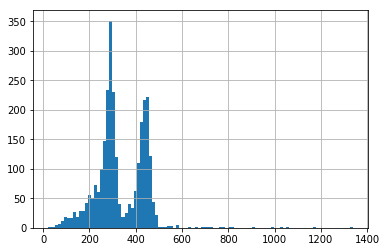

In [7]:
proy_ca["DESCRIPCION"].str.count(' ').hist(bins=100)

---

In [8]:
proy_fc = pd.read_csv(files_path + "proyectos_fc.csv")

In [9]:
proy_fc["longitud"] = proy_fc['DESCRIPCION'].str.count(' ')
proy_fc.sort_values("longitud",ascending=False, inplace=True)
proy_fc = proy_fc.drop_duplicates("ID_PROYECTO",keep="first")
proy_fc = proy_fc[proy_fc['DESCRIPCION'].str.count(' ') > 20]

In [10]:
proy_fc = proy_fc[['ID_PROYECTO','NUMERO_CONVOCATORIA','ANIO','PALABRAS_CLAVE','SUBDISCIPLINA','DISCIPLINA','AREA','TITULO','DESCRIPCION']]

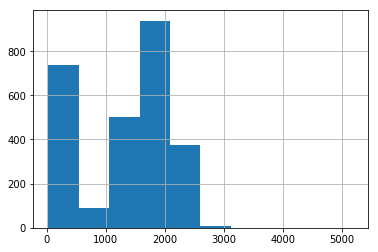

In [11]:
proy_fc["DESCRIPCION"].str.count(' ').hist()

---

In [12]:
proy_miic = pd.read_csv(files_path + "/proyectos_miic.csv")

In [13]:
proy_miic['NUMERO_CONVOCATORIA'] = 'miic'
proy_miic['ANIO']= 2000

In [14]:
proy_miic["longitud"] = proy_miic['DESCRIPCION'].str.count(' ')
proy_miic.sort_values("longitud",ascending=False, inplace=True)
proy_miic = proy_miic.drop_duplicates("ID_PROYECTO",keep="first")
proy_miic = proy_miic[proy_miic['DESCRIPCION'].str.count(' ') > 20]

In [15]:
proy_miic = proy_miic[['ID_PROYECTO','NUMERO_CONVOCATORIA','ANIO','PALABRAS_CLAVE','SUBDISCIPLINA','DISCIPLINA','AREA','TITULO','DESCRIPCION']]

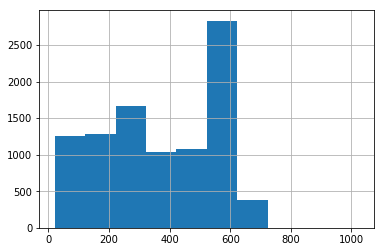

In [16]:
proy_miic["DESCRIPCION"].str.count(' ').hist()

---

In [17]:
proy_pn = pd.read_csv(files_path + "/proyectos_pn.csv")

In [18]:
proy_pn["longitud"] = proy_pn['DESCRIPCION'].str.count(' ')
proy_pn.sort_values("longitud",ascending=False, inplace=True)
proy_pn = proy_pn.drop_duplicates("ID_PROYECTO",keep="first")
proy_pn = proy_pn[proy_pn['DESCRIPCION'].str.count(' ') > 20]

In [19]:
proy_pn = proy_pn[['ID_PROYECTO','NUMERO_CONVOCATORIA','ANIO','PALABRAS_CLAVE','SUBDISCIPLINA','DISCIPLINA','AREA','TITULO','DESCRIPCION']]

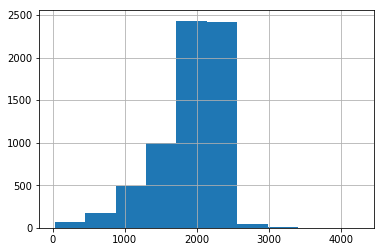

In [20]:
proy_pn["DESCRIPCION"].str.count(' ').hist()

# People soft

In [21]:
people_soft = pd.read_csv(files_path +  "/people_soft_proyectos/descripcion_ps.csv")
people_soft["PROJECT_ID"] = pd.to_numeric(people_soft["PROJECT_ID"], errors='coerce')
people_soft.dropna(inplace=True)
people_soft["PROJECT_ID"] = people_soft["PROJECT_ID"].astype(int)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
people_soft.rename({"CN_DESCRPROPUS":"DESCRIPCION","PROJECT_ID":"ID_PROYECTO",
                   "BUSINESS_UNIT":"NUMERO_CONVOCATORIA"},axis=1, inplace=True)

In [23]:
people_soft["longitud"] = people_soft['DESCRIPCION'].str.count(' ')

In [24]:
people_soft.sort_values("longitud",ascending=False, inplace=True)
people_soft = people_soft.drop_duplicates("ID_PROYECTO",keep="first")
people_soft = people_soft[people_soft['DESCRIPCION'].str.count(' ') > 20]
#  people_soft = people_soft[people_soft['DESCRIPCION'].str.count(' ') < 10000]

LLenamos datos faltantes

In [25]:
people_soft['ANIO'] = 2000
people_soft['PALABRAS_CLAVE'] = None
people_soft['DISCIPLINA'] = None
people_soft['SUBDISCIPLINA'] = None
people_soft['TITULO'] = None
people_soft['AREA'] = None

In [26]:
people_soft = people_soft[['ID_PROYECTO','NUMERO_CONVOCATORIA','ANIO','PALABRAS_CLAVE','SUBDISCIPLINA','DISCIPLINA','AREA','TITULO','DESCRIPCION']]

In [27]:
people_soft.head(2)

,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,PALABRAS_CLAVE,SUBDISCIPLINA,DISCIPLINA,AREA,TITULO,DESCRIPCION
147233,162011,S0008,2000,None,None,None,None,None,Instituto Nacional de Ciencias Médicas y Nutri...
204114,212258,C003V,2000,None,None,None,None,None,i)\tAntecedentes y estrategia tecnológica\r\n\...


# Evaluadores

In [28]:
evaluadores_ca = pd.read_csv(files_path + "./evaluadores/evaluadores_ca.csv")
evaluadores_ca = evaluadores_ca[['ID_PROYECTO', 'NUMERO_CONVOCATORIA', 'ANIO', 'CVU']]

In [29]:
evaluadores_fc = pd.read_csv(files_path + "/evaluadores/evaluadores_fc.csv")
evaluadores_fc = evaluadores_fc[['ID_PROYECTO', 'NUMERO_CONVOCATORIA', 'ANIO', 'CVU']]

In [30]:
evaluadores_miic = pd.read_csv(files_path + "/evaluadores/evaluadores_miic.csv")
evaluadores_miic.rename({"ID_SOLICITUD":"ID_PROYECTO"},inplace=True,axis=1)
evaluadores_miic['NUMERO_CONVOCATORIA'] = 'miic'
evaluadores_miic['ANIO']=2000
evaluadores_miic = evaluadores_miic[['ID_PROYECTO', 'NUMERO_CONVOCATORIA', 'ANIO', 'CVU']]

In [31]:
evaluadores_pn = pd.read_csv(files_path + "/evaluadores/evaluadores_pn.csv")
evaluadores_pn = evaluadores_pn[['ID_PROYECTO', 'NUMERO_CONVOCATORIA', 'ANIO', 'CVU']]

In [32]:
evaluadores_ps = pd.read_csv(files_path + "/people_soft_proyectos/evaluadores_ps.csv")
evaluadores_ps.rename({"PROJECT_ID":"ID_PROYECTO",
                   "BUSINESS_UNIT":"NUMERO_CONVOCATORIA"},axis=1, inplace=True)

evaluadores_ps = evaluadores_ps[["CVU","NUMERO_CONVOCATORIA", "ID_PROYECTO"]]

evaluadores_ps["ID_PROYECTO"] = pd.to_numeric(evaluadores_ps["ID_PROYECTO"], errors='coerce')
evaluadores_ps.dropna(inplace=True)
evaluadores_ps["ID_PROYECTO"] = evaluadores_ps["ID_PROYECTO"].astype(int)
evaluadores_ps["ANIO"] = 2000

evaluadores_ps = evaluadores_ps[['ID_PROYECTO', 'NUMERO_CONVOCATORIA', 'ANIO', 'CVU']]

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


___

# Merge
## Proyectos

In [33]:
df_merge = proy_ca.append(
    proy_fc).append(
    proy_miic).append(
    proy_pn).append(
    people_soft).reset_index(drop=True)
df_merge.shape 

(198719, 9)

In [34]:
df_merge.head(2)

,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,PALABRAS_CLAVE,SUBDISCIPLINA,DISCIPLINA,AREA,TITULO,DESCRIPCION
0,1120,CATEDRAS-2015-01,2015,NaN,NaN,NaN,NaN,FORTALECIMIENTO DEL LABORATORIO DE ODONTOLOGÍA...,RESULTADOS A 5-10 AÑOS\r\n\r\n¿\tFormación de ...
1,390,CATEDRAS-2016-01,2016,NaN,NaN,NaN,NaN,Fortalecimiento de la Maestría en Ciencias Odo...,Programa ...


## Evaluadores

In [35]:
df_merge_eval = evaluadores_ca.append(
    evaluadores_fc).append(
    evaluadores_miic).append(
    evaluadores_pn).append(
    evaluadores_ps)

In [36]:
df_merge_eval.head()

,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,CVU
0,1093,CATEDRAS-2015-01,2015,31151.0
1,1235,CATEDRAS-2015-01,2015,18804.0
2,1235,CATEDRAS-2015-01,2015,4867.0
3,554,CATEDRAS-2015-01,2015,3188.0
4,390,CATEDRAS-2015-01,2015,2195.0


In [37]:
df_merge_eval.shape

(809038, 4)

In [40]:
df_merge_eval["CVU"].nunique()

28674

In [41]:
dump(df_merge_eval, files_path + "./join_evaluadores_todas_convocatorias.pkl")

['../../data/data_entrenamiento/data_entrenamiento_raw/historico_convocatorias/./join_evaluadores_todas_convocatorias.pkl']

___

## Filtro nuevo requerimiento

1. Filtrar de la bolsa de evaluadores:
    * Nivel de SNI (+1)
    * SNI vigentes

2. Filtrar de la convocatoria actual:
    * Eliminar modalidad SINERGIA
    * Responsables técnicos convocatoria

In [71]:
miembros_sni = pd.read_csv(files_path +  '../SNI_catalogo/SNI_vigentes_final.csv')
miembros_sni.head(3)

,CVU,IVIGENCIA,FVIGENCIA,NIVEL
0,83,2008-01-02,2022-12-31 00:00:00,1
1,97,2016-01-01,2019-12-31 00:00:00,1
2,174,2012-01-02,2029-12-31 00:00:00,1


In [72]:
miembros_sni["CVU"].nunique()

9325

In [73]:
evaluadores_filtro  = miembros_sni.merge(df_merge_eval, left_on='CVU', right_on='CVU',how='inner')

In [74]:
evaluadores_filtro["CVU"].nunique()

8954

In [75]:
evaluadores_filtro.head()

,CVU,IVIGENCIA,FVIGENCIA,NIVEL,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO
0,83,2008-01-02,2022-12-31 00:00:00,1,619,PROBLEMAS-2015-01,2015
1,83,2008-01-02,2022-12-31 00:00:00,1,1779,PROBLEMAS-2015-01,2015
2,83,2008-01-02,2022-12-31 00:00:00,1,109898,C0003,2000
3,83,2008-01-02,2022-12-31 00:00:00,1,112657,C0003,2000
4,83,2008-01-02,2022-12-31 00:00:00,1,112671,C0003,2000


In [76]:
evaluadores_filtro_texto = evaluadores_filtro.merge(
    df_merge, on=['ID_PROYECTO','NUMERO_CONVOCATORIA','ANIO'])# .drop_duplicates(['ID_PROYECTO','NUMERO_CONVOCATORIA','ANIO'])

In [77]:
evaluadores_filtro_texto.head(2)

,CVU,IVIGENCIA,FVIGENCIA,NIVEL,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,PALABRAS_CLAVE,SUBDISCIPLINA,DISCIPLINA,AREA,TITULO,DESCRIPCION
0,83,2008-01-02,2022-12-31 00:00:00,1,619,PROBLEMAS-2015-01,2015,"Energía eólica y solar,uso agrícola,automatiza...",AUTOMATIZACION Y CONTROL,INGENIERÍA ELÉCTRICA,INGENIERÍA Y TECNOLOGÍA,Estación Híbrida de energía eólica y solar par...,Título de la Propuesta: Estación híbrida de en...
1,160807,2016-01-01,2019-12-31 00:00:00,1,619,PROBLEMAS-2015-01,2015,"Energía eólica y solar,uso agrícola,automatiza...",AUTOMATIZACION Y CONTROL,INGENIERÍA ELÉCTRICA,INGENIERÍA Y TECNOLOGÍA,Estación Híbrida de energía eólica y solar par...,Título de la Propuesta: Estación híbrida de en...


In [80]:
evaluadores_filtro_texto["CVU"].nunique()

8844

In [78]:
evaluadores_filtro_texto.shape

(261853, 13)

In [55]:
evaluadores_filtro_texto["CVU"].value_counts().mean()

29.607982813206693

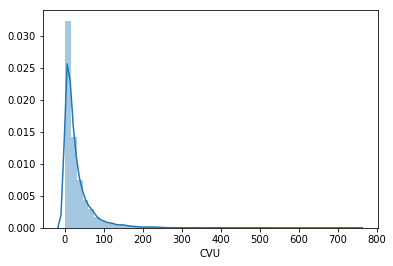

In [56]:
sns.distplot(evaluadores_filtro_texto["CVU"].value_counts())

## Nos quedamos con K proyectos por evaluador

Desordenamos el DF

In [2]:
evaluadores_filtro_texto = evaluadores_filtro_texto.sample(frac=1).reset_index(drop=True)

NameError: name 'evaluadores_filtro_texto' is not defined

In [55]:
lista_coincidencia_cvu = []
for CVU in evaluadores_filtro_texto["CVU"].unique():
    coincidencia_cvu = evaluadores_filtro_texto[evaluadores_filtro_texto["CVU"]==CVU].head(5)
    lista_coincidencia_cvu.append(coincidencia_cvu)

In [56]:
lista_coincidencia_cvu[9]

,CVU,IVIGENCIA,FVIGENCIA,NIVEL,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,PALABRAS_CLAVE,SUBDISCIPLINA,DISCIPLINA,AREA,TITULO,DESCRIPCION
10,3865,2011-01-01,2020-12-31 00:00:00,3,281249,I0017,2000,None,None,None,None,None,Antecedentes. El cáncer epitelial ovárico (CE...
9669,3865,2011-01-01,2020-12-31 00:00:00,3,180722,S0008,2000,None,None,None,None,None,En México desde 2006 el cáncer de mama consti...
16640,3865,2011-01-01,2020-12-31 00:00:00,3,2519,FRONTERAS-2016-01,2016,"embarazo, parto pretérmino, estrés, CRH, corti...",NaN,NaN,MEDICINA Y CIENCIAS DE LA SALUD,La regulación neuroendócrina del sistema inmun...,DISEÑO Y TAMAÑO DE MUESTRA\r\nLlevaremos a cab...
29762,3865,2011-01-01,2020-12-31 00:00:00,3,99294,I0003,2000,None,None,None,None,None,"LA BIOTINA ES UNA VITAMINA DEL COMPLEJO B QUE,..."
29995,3865,2011-01-01,2020-12-31 00:00:00,3,128752,I0003,2000,None,None,None,None,None,El cáncer de mama es el tumor maligno de mayor...


In [57]:
dataframe_head = lista_coincidencia_cvu[0].append(lista_coincidencia_cvu[1])
for i in range(1,len(lista_coincidencia_cvu)):
    dataframe_head = dataframe_head.append(lista_coincidencia_cvu[i].reset_index(drop=True))
dataframe_head.reset_index(inplace=True, drop=True)

In [58]:
dataframe_head[dataframe_head["CVU"]==160807]

,CVU,IVIGENCIA,FVIGENCIA,NIVEL,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,PALABRAS_CLAVE,SUBDISCIPLINA,DISCIPLINA,AREA,TITULO,DESCRIPCION
25369,160807,2016-01-01,2019-12-31 00:00:00,1,206007,I0015,2000,None,None,None,None,None,FORTALECIMIENTO DE INFRAESTRUCTURA DE LOS CUER...
25370,160807,2016-01-01,2019-12-31 00:00:00,1,220304,I0017,2000,None,None,None,None,None,En este proyecto nos enfocaremos en desarrolla...
25371,160807,2016-01-01,2019-12-31 00:00:00,1,256862,I0017,2000,None,None,None,None,None,El uso de energías alternativas ha sido y será...
25372,160807,2016-01-01,2019-12-31 00:00:00,1,221655,I0017,2000,None,None,None,None,None,La tecnología de diseño y fabricación de biose...
25373,160807,2016-01-01,2019-12-31 00:00:00,1,258849,I0017,2000,None,None,None,None,None,La investigación y desarrollo de materiales se...


# Save